In [1]:
import torch
from torch import nn,optim
import torch.nn.functional
import torch.nn.functional as F
import numpy as np
import pandas as pd
import os as os
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,multilabel_confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from scipy.stats import kurtosis,skew
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif
import scipy.stats
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from imblearn.over_sampling import SMOTE


from sklearn.model_selection import cross_val_score

#import warnings

#warnings.simplefilter(action='ignore', category=FutureWarning)



<h1>Train data prep</h1>

una osservazione ogni secondo <br>
1200 osservazioni per dataframe<br>
Le colonne P1-P7 sono pressioni nei punti di misurazione<br>

In [2]:
path_dataset= '/Users/alexdediu/git-projects/Data-Challenge-PHM-Asia-Pacific-2023/dataset'
path_dataframes="/Users/alexdediu/git-projects/Data-Challenge-PHM-Asia-Pacific-2023/dataframes"
path_data = "/data"
path_labels = "/labels_spacecraft.xlsx"



dfs_data = []

for filename in os.listdir(f"{path_dataset}/train/data"):
    if filename.endswith('.csv'):
       
        percorso_file = os.path.join(path_train+path_data, filename)
        df = pd.read_csv(percorso_file)

        # gruppi = [df.iloc[i:i+120] for i in range(0, len(df), 120)]
        # for gruppo in gruppi:
        
        dfs_data.append(df)

df_data = pd.concat(dfs_data, ignore_index=True)

df_data.to_csv(f"{path_dataframes}/df_original_data.csv")
# df_data.to_csv("df_complete.csv")



In [3]:
# path_train = '/Users/alexdediu/git-projects/Data-Challenge-PHM-Asia-Pacific-2023/dataset/test'
# path_data = "/data"
# path_labels = "/labels_spacecraft.xlsx"


# dfs_data = []

# for filename in os.listdir(path_train+path_data):
#     if filename.endswith('.csv'):
       
#         percorso_file = os.path.join(path_train+path_data, filename)
#         df = pd.read_csv(percorso_file)

#         # gruppi = [df.iloc[i:i+120] for i in range(0, len(df), 120)]
#         # for gruppo in gruppi:
        
#         dfs_data.append(df)

# df_data = pd.concat(dfs_data, ignore_index=True)


In [5]:
traces = []
for column in df.columns:
    if column != 'TIME':  
        trace = go.Scatter(x=df['TIME'], y=df[column], mode='lines', name=column)
        traces.append(trace)


layout = go.Layout(title='Line Plot per le colonne del DataFrame',
                   xaxis=dict(title='TIME'),
                   yaxis=dict(title='Valore'))


fig = go.Figure(data=traces, layout=layout)


fig.show()

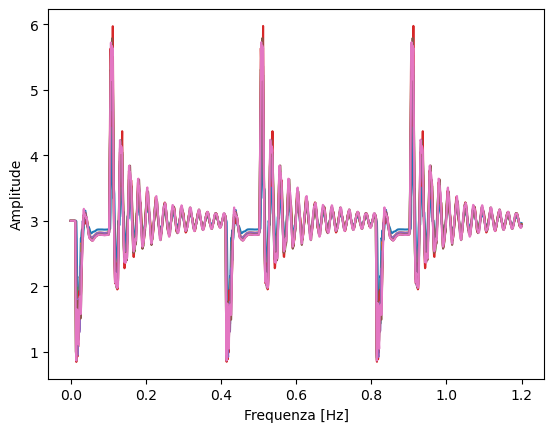

In [6]:
temp = dfs_data[0].copy()
temp = temp.drop(columns=["TIME"])
plt.plot(dfs_data[0]["TIME"],temp)
plt.xlabel('Frequenza [Hz]')
plt.ylabel('Amplitude')
plt.show()


# Creazione dei df per FFT.

eliminazione della frequenza 0 (componente DC).

fftfreq calcola le frequenze associate ai coefficienti ottenuti dalla fft.

il plot seguente ha sull'asse x le frequenze e sull'asse y la fft.

per la ftt basta la parte reale o bisogna mantenere anche la fase (parte immaginaria)?


In [7]:
# import pandas as pd
# import numpy as np
# import scipy.stats

# dfs_freq = []
# dfs_fft = []
# freq_dom = []

# for df in dfs_data:
#     fft_df = pd.DataFrame()
#     fft_freq = pd.DataFrame()
#     freq_dom_col = pd.DataFrame()

#     for col in df.columns:
#         if col != "TIME":
#             fft_result = np.fft.fft(df[col]).real
#             freq = np.fft.fftfreq(len(df[col]))

#             # Eliminazione della frequenza 0 (media della serie temporale originale)
#             fft_result = fft_result[1:]
#             freq = freq[1:]

#             # Individuazione della frequenza dominante
#             index_dominant_peak = np.argmax(np.abs(fft_result))
#             dominant_freq = freq[index_dominant_peak]
#             spettro_potenza = np.abs(fft_result) ** 2
#             mean_power_spectrum = np.mean(spettro_potenza)
#             print(spettro_potenza)
#             # Calcolo dell'energia
#             energia = np.sum(spettro_potenza)
#             # Calcola la distribuzione di probabilità dei valori nel segnale
#             prob_dist = np.abs(np.fft.fft(df[col]).real) ** 2 / np.sum(np.abs(np.fft.fft(df[col]).real) ** 2)

#             # Calcola l'entropia utilizzando la distribuzione di probabilità
#             entropia = scipy.stats.entropy(prob_dist)
#             max_val = np.max(np.abs(fft_result[1:]))

#             # Calcola il valore impulsivo
#             impulse_factor = max_val / np.mean(np.abs(df[col]))

#             # Calcola il valore di picco
#             crest_factor = max_val / np.sqrt(np.mean(np.square(df[col])))

#             # Aggiungi crest factor e impulse factor al DataFrame
#             freq_dom_col[col + "_crest_factor"] = [crest_factor]
#             freq_dom_col[col + "_impulse_factor"] = [impulse_factor]

#             # Aggiungi l'entropia al DataFrame
#             # freq_dom_col[col + "_entropia"] = [entropia]

#             # Aggiungi la frequenza dominante al DataFrame
#             # freq_dom_col[col + "_freq_dom"] = [dominant_freq]
            
#             # Aggiungi l'energia al DataFrame
#             # freq_dom_col[col + "_energia"] = [energia]

#             # Calcola lo spettro di frequenza
#             freq_dom_col[col + "_spettro_potenza"] = [mean_power_spectrum]

#             fft_df[col + '_fft'] = fft_result
#             # fft_freq[col + '_freq'] = freq

#     dfs_freq.append(fft_freq)
#     dfs_fft.append(fft_df)
#     freq_dom.append(freq_dom_col)

# # Concatenazione dei DataFrame delle frequenze dominanti
# df_freq_dom = pd.concat(freq_dom, axis=0)

# # Visualizzazione del DataFrame delle frequenze dominanti
# print(df_freq_dom)


In [8]:
sampling_rate = 1000  # 1 kHz

signal_length_ms = 1200

In [9]:
import pandas as pd
import numpy as np
from scipy import signal
from scipy.stats import skew, kurtosis

def stats_spectrum( spectrum):
    mean_power_spectrum = np.mean(spectrum)

    sum_power_spectrum = np.sum(spectrum)

    std_power_spectrum = np.std(spectrum)

    skewness_power_spectrum = skew(spectrum)

    kurtosis_power_spectrum = kurtosis(spectrum)

    return mean_power_spectrum, sum_power_spectrum, std_power_spectrum, skewness_power_spectrum, kurtosis_power_spectrum



 



In [10]:

def calculate_spectral_features(time_series,freqs,spectrum):
   

    signal_power = np.sum(spectrum)
    noise_power = np.sum(spectrum[freqs > 0.5 * sampling_rate])
    distortion_power = signal_power - noise_power 

    epsilon = 1e-10
    snr = 10 * np.log10(signal_power / (noise_power + epsilon))

    sinad = 10 * np.log10(signal_power / (noise_power + distortion_power + epsilon))

    peak_amplitude = np.max(time_series)

    band_power = np.sum(spectrum[(freqs >= 1) & (freqs <= 50)])

    peak_value = np.max(spectrum)

    peak_freq = freqs[np.argmax(spectrum)]

    mean_power_spectrum = np.mean(spectrum)

    sum_power_spectrum = np.sum(spectrum)

    return sinad, snr, peak_amplitude, band_power, peak_value, peak_freq, mean_power_spectrum, sum_power_spectrum

def calculate_additional_spectral_features(freqs,spectrum):
    

    prominent_harmonic_freq = freqs[np.argmax(spectrum)]

    harmonic_amplitude_ratio = np.max(spectrum) / np.mean(spectrum)

    main_harmonic_bandwidth = freqs[np.argmax(spectrum)] - freqs[np.argmin(spectrum)]

    relative_peak_freq = freqs[np.argmax(spectrum)] / prominent_harmonic_freq

    harmonic_energy = np.sum(spectrum)

    return prominent_harmonic_freq, harmonic_amplitude_ratio, main_harmonic_bandwidth, relative_peak_freq, harmonic_energy


dfs_freq = []
dfs_fft = []
freq_dom = []

for df in dfs_data:
    fft_df = pd.DataFrame()
    fft_freq = pd.DataFrame()
    freq_dom_col = pd.DataFrame()

    for col in df.columns:
        if col != "TIME":
            print(col)
            fft_result = np.fft.fft(df[col]).real
            
            freq = np.fft.fftfreq(len(df[col]), d=1/sampling_rate)


            fft_result = fft_result[1:]
            freq = freq[1:]
            power_spectrum = np.abs(fft_result) ** 2
          
       
       
            sinad, snr, peak_amplitude, band_power, peak_value, peak_freq, mean_power_spectrum, sum_power_spectrum = calculate_spectral_features(df[col],freq,power_spectrum)
            max_val = np.max(np.abs(fft_result[1:]))
            impulse_factor = max_val / np.mean(np.abs(df[col]))
            crest_factor = max_val / np.sqrt(np.mean(np.square(df[col])))
            mean_power_spectrum, sum_power_spectrum, std_power_spectrum, skewness_power_spectrum, kurtosis_power_spectrum = stats_spectrum(power_spectrum)

            freq_dom_col[col + "_SINAD"] = [sinad]
            freq_dom_col[col + "_SNR"] = [snr]
            # freq_dom_col[col + "_crest_factor"] = [crest_factor]
            # freq_dom_col[col + "_impulse_factor"] = [impulse_factor]
            freq_dom_col[col + "_PeakAmp"] = [peak_amplitude]
            freq_dom_col[col + "_BandPower"] = [band_power]
            freq_dom_col[col + "_PeakValue"] = [peak_value]
            freq_dom_col[col + "_PeakFreq"] = [peak_freq]
            freq_dom_col[col + "_MeanPowerSpectrum"] = [mean_power_spectrum]
            freq_dom_col[col + "_SumPowerSpectrum"] = [sum_power_spectrum]
            # freq_dom_col[col + "_StdPowerSpectrum"] = [std_power_spectrum]
            # freq_dom_col[col + "_SkewnessPowerSpectrum"] = [skewness_power_spectrum]
            # freq_dom_col[col + "_KurtosisPowerSpectrum"] = [kurtosis_power_spectrum]
            # freq_dom_col[col + "_MeanPowerSpectrum"] = [mean_power_spectrum]
            # freq_dom_col[col + "_SumPowerSpectrum"] = [sum_power_spectrum]
            prominent_harmonic_freq, harmonic_amplitude_ratio, main_harmonic_bandwidth, relative_peak_freq, harmonic_energy = calculate_additional_spectral_features(freq,power_spectrum)
            
           
            # freq_dom_col[col + "_ProminentHarmonicFreq"] = [prominent_harmonic_freq]
            # freq_dom_col[col + "_HarmonicAmplitudeRatio"] = [harmonic_amplitude_ratio]
            # freq_dom_col[col + "_MainHarmonicBandwidth"] = [main_harmonic_bandwidth]
            # freq_dom_col[col + "_RelativePeakFreq"] = [relative_peak_freq]
            # freq_dom_col[col + "_HarmonicEnergy"] = [harmonic_energy]

            fft_df[col + '_fft'] = fft_result
            fft_freq[col + '_freq'] = freq

    dfs_freq.append(fft_freq)
    dfs_fft.append(fft_df)
    freq_dom.append(freq_dom_col)

df_freq_dom = pd.concat(freq_dom, axis=0)

print(df_freq_dom)


P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
P1
P2
P3
P4
P5
P6
P7
       P1_SINAD      P1_SNR  P1_Pe

In [11]:
# condition_map = {'Normal':1,'Fault':2,'Anomaly':3}
# bp_map = {'No':0,'Yes':1}
df_labels = pd.read_excel(path_train+path_labels,header=1)

In [12]:
freq_dom[0]
# df_condition_2 = df_labels[df_labels["Condition"] == 2]
# df_condition_3 = df_labels[df_labels["Condition"] == 3]

,P1_SINAD,P1_SNR,P1_PeakAmp,P1_BandPower,P1_PeakValue,P1_PeakFreq,P1_MeanPowerSpectrum,P1_SumPowerSpectrum,P2_SINAD,P2_SNR,...,P6_MeanPowerSpectrum,P6_SumPowerSpectrum,P7_SINAD,P7_SNR,P7_PeakAmp,P7_BandPower,P7_PeakValue,P7_PeakFreq,P7_MeanPowerSpectrum,P7_SumPowerSpectrum
0,-5.785965e-15,148.730186,5.319466,29733.204108,6340.006097,42.464613,62.206728,74648.074041,-2.410819e-15,151.603006,...,183.93731,220724.771713,-1.446491e-15,153.701948,5.727131,106478.35239,23426.357747,42.464613,195.440058,234528.069847


Colonne più importanti del df con fft

In [13]:


df_labels = df_labels.rename(columns={"Spacecraft#":"Spacecraft","Case#":"Case"})
df_labels
# df_labels["Condition"] = df_labels["Condition"].map(condition_map)
# bp_columns = [col for col in df_labels.columns if ("BP" in col) or("BV" in col)]
# print(bp_columns)

# def map_condition(value):
#     if value == 1:
#         return 0
#     elif value in [2, 3]:
#         return 1
#     else:
#         return None  

# df_labels['binary_condition'] = df_labels['Condition'].apply(map_condition)

# for col in bp_columns:
#     df_labels[col] = df_labels[col].map(bp_map)

# df_labels.to_csv("df_labels.csv")



,Case,Spacecraft
0,178,1
1,179,1
2,180,1
3,181,1
4,182,1
5,183,1
6,184,1
7,185,1
8,186,1
9,187,1


In [14]:
def calculate_column_statistics(column):
 
    statistics = {
        'mean': column.mean(),
        'median': column.median(),
        'std': column.std(),
        'min': column.min(),
        'max': column.max(),
        '25th_percentile': column.quantile(0.25),
        '75th_percentile': column.quantile(0.75),
        'kurtosis': kurtosis(column),
        'skewness': skew(column)
    
        # Puoi aggiungere altre statistiche a seconda delle tue esigenze
    }
    return pd.Series(statistics)

# Stats su serie temporale

In [15]:
dfs_temp_stats = []
lags = [2,3,5,7]

# Calcola le statistiche per ogni DataFrame nella lista
for df in dfs_data:
    statistics_dict = {}
    for col in df.columns:
        if col != "TIME":
            # print(col)
            column_stats = calculate_column_statistics(df[col])
            # Aggiungi le statistiche calcolate al dizionario
            statistics_dict[col + "_mean"] = column_stats["mean"]
            statistics_dict[col + "_median"] = column_stats["median"]
            statistics_dict[col + "_std"] = column_stats["std"]
            statistics_dict[col + "_min"] = column_stats["min"]
            statistics_dict[col + "_max"] = column_stats["max"]
            statistics_dict[col + "_25th_percentile"] = column_stats["25th_percentile"]
            statistics_dict[col + "_75th_percentile"] = column_stats["75th_percentile"]
            # statistics_dict[col + "_kurtosis"] = column_stats["kurtosis"]
            # statistics_dict[col + "_skewness"] = column_stats["skewness"]
         
    statistics_df = pd.DataFrame(statistics_dict, index=[0])
    dfs_temp_stats.append(statistics_df)



# Stats su dfs FFT

In [16]:
dfs_fft_stats = []

for df in dfs_fft:
    statistics_dict = {}
    for col in df.columns:
        if col != "TIME":
            column_stats = calculate_column_statistics(df[col])
            statistics_dict[col + "_mean"] = column_stats["mean"]
            statistics_dict[col + "_median"] = column_stats["median"]
            statistics_dict[col + "_std"] = column_stats["std"]
            statistics_dict[col + "_min"] = column_stats["min"]
            statistics_dict[col + "_max"] = column_stats["max"]
            statistics_dict[col + "_25th_percentile"] = column_stats["25th_percentile"]
            statistics_dict[col + "_75th_percentile"] = column_stats["75th_percentile"]
            statistics_dict[col + "_kurtosis"] = column_stats["kurtosis"]
            # statistics_dict[col + "_skewness"] = column_stats["skewness"]
    
    statistics_df = pd.DataFrame(statistics_dict, index=[0])
    dfs_fft_stats.append(statistics_df)




In [17]:
dfs_temp_stats = pd.concat(dfs_temp_stats,axis=0)
dfs_fft_stats= pd.concat(dfs_fft_stats,axis=0)

In [18]:
dfs_fft_stats.head()

,P1_fft_mean,P1_fft_median,P1_fft_std,P1_fft_min,P1_fft_max,P1_fft_25th_percentile,P1_fft_75th_percentile,P1_fft_kurtosis,P2_fft_mean,P2_fft_median,...,P6_fft_75th_percentile,P6_fft_kurtosis,P7_fft_mean,P7_fft_median,P7_fft_std,P7_fft_min,P7_fft_max,P7_fft_25th_percentile,P7_fft_75th_percentile,P7_fft_kurtosis
0,0.023841,0.032414,7.890377,-79.624155,57.688076,-0.493473,0.571949,36.221430,0.031361,0.001184,...,0.947708,52.058875,0.036553,-0.001167,13.985769,-153.056714,109.731279,-0.878453,0.929280,51.048931
0,0.015068,0.096019,7.511140,-78.256537,72.458660,-1.086311,1.123119,48.101437,0.022069,-0.109957,...,1.662365,64.771532,0.026731,0.173038,14.334500,-150.628436,151.115033,-1.716518,1.846230,59.135375
0,0.015609,-0.017256,7.623729,-75.685872,89.869362,-0.820224,0.771764,53.404042,0.021384,0.023003,...,1.899588,68.480343,0.033353,-0.036688,15.352987,-167.143313,173.233134,-1.752556,1.576237,58.124218
0,0.023906,0.035921,7.801445,-72.519625,58.238395,-0.508226,0.596457,33.023439,0.031377,0.034308,...,0.967529,47.899703,0.036569,0.070610,13.698737,-139.057732,110.821857,-0.858917,1.007772,46.621742
0,0.015000,0.117279,7.503802,-77.644198,70.774312,-1.119140,1.169136,46.721186,0.022342,-0.031082,...,1.755319,56.691098,0.025780,0.205908,14.191310,-146.116850,143.312787,-1.782696,2.211437,55.003391


In [19]:
dfs_temp_stats.head()

,P1_mean,P1_median,P1_std,P1_min,P1_max,P1_25th_percentile,P1_75th_percentile,P2_mean,P2_median,P2_std,...,P6_max,P6_25th_percentile,P6_75th_percentile,P7_mean,P7_median,P7_std,P7_min,P7_max,P7_25th_percentile,P7_75th_percentile
0,2.976179,2.974052,0.325922,1.411117,5.319466,2.870958,3.064182,2.968665,2.952657,0.451560,...,5.790108,2.786597,3.120749,2.963477,2.936867,0.571772,0.865684,5.727131,2.782391,3.126940
0,1.984945,1.958735,0.307647,0.438743,4.274295,1.892944,2.062354,1.977949,1.925262,0.446734,...,4.958303,1.807682,2.134832,1.973291,1.904726,0.577862,0.011023,4.964566,1.802025,2.139402
0,1.984404,1.964903,0.286992,0.777007,4.245348,1.896175,2.052484,1.978634,1.945295,0.429373,...,5.280260,1.807205,2.121129,1.966675,1.905942,0.584880,-0.005569,4.720684,1.806102,2.119589
0,2.976114,2.973362,0.324915,1.409678,5.266962,2.870922,3.061957,2.968649,2.954346,0.456328,...,5.522101,2.786421,3.124768,2.963461,2.936283,0.567643,0.865684,5.692071,2.782816,3.126938
0,1.985013,1.960087,0.308606,0.436861,4.294356,1.893249,2.058644,1.977676,1.925611,0.446958,...,5.009766,1.807916,2.134698,1.974242,1.915720,0.580422,-0.006510,4.995885,1.798214,2.137636


In [20]:
df_features = pd.concat([dfs_temp_stats,dfs_fft_stats,df_freq_dom],axis=1)

In [21]:
df_features  = df_features.reset_index()
df_features = df_features.drop(columns="index")

# df_features["Condition"] = df_labels["Condition"]
# df_features["binary_condition"] = df_labels["binary_condition"]

In [22]:
df_y = pd.DataFrame()
# df_features = df_features[df_features["Condition"] != 2]
# df_y["Condition"] = df_features["Condition"]
# df_y["binary_condition"] = df_features["binary_condition"]

In [23]:
scaler_features = MinMaxScaler()


df_features_scaled = scaler_features.fit_transform(df_features)

df_features = pd.DataFrame(df_features_scaled, columns=df_features.columns)
# y_test = scaler_y.fit_transform(np.array(y_test).reshape(-1, 1))
# y_train = scaler_y.fit_transform(np.array(y_train).reshape(-1, 1))

df_features

,P1_mean,P1_median,P1_std,P1_min,P1_max,P1_25th_percentile,P1_75th_percentile,P2_mean,P2_median,P2_std,...,P6_MeanPowerSpectrum,P6_SumPowerSpectrum,P7_SINAD,P7_SNR,P7_PeakAmp,P7_BandPower,P7_PeakValue,P7_PeakFreq,P7_MeanPowerSpectrum,P7_SumPowerSpectrum
0,0.998048,1.000000,0.661883,1.000000,0.848346,1.000000,0.996032,0.997580,0.998370,0.356256,...,0.294736,0.294736,4.821637e-16,0.388454,0.659056,1.000000,0.266000,0.814815,0.308677,0.308677
1,0.000758,0.003526,0.419311,0.161512,0.157622,0.002292,0.009717,0.001524,0.006306,0.310287,...,0.254609,0.254609,4.821637e-16,0.459221,0.159702,0.000000,0.249594,0.981481,0.374461,0.374461
2,0.000213,0.009580,0.145147,0.453201,0.138492,0.005588,0.000000,0.002213,0.025651,0.144918,...,0.456473,0.456473,0.000000e+00,0.656464,0.000000,0.207864,0.448872,0.962963,0.575878,0.575878
3,0.997983,0.999323,0.648519,0.998759,0.813648,0.999963,0.993841,0.997564,1.000000,0.401669,...,0.237427,0.237427,4.821637e-16,0.328867,0.636097,0.940534,0.152407,0.814815,0.255743,0.255743
4,0.000826,0.004853,0.432044,0.159890,0.170880,0.002604,0.006065,0.001250,0.006643,0.312420,...,0.401698,0.401698,4.821637e-16,0.430372,0.180211,0.004754,0.208326,1.000000,0.347252,0.347252
5,0.000694,0.002124,0.429808,0.159696,0.130381,0.002850,0.006252,0.001276,0.007444,0.305630,...,0.452542,0.452542,4.821637e-16,0.401623,0.190320,0.011581,0.221026,0.981481,0.320674,0.320674
6,0.000197,0.000721,0.421725,0.299438,0.227012,0.001662,0.006991,0.000296,0.011481,0.214421,...,0.039743,0.039743,0.000000e+00,0.008473,0.195708,0.070560,0.290036,0.944444,0.005881,0.005881
7,0.000724,0.002238,0.430252,0.159689,0.153221,0.002706,0.006051,0.001361,0.004464,0.310159,...,0.411492,0.411492,4.821637e-16,0.373479,0.193133,0.036350,0.262287,0.981481,0.295167,0.295167
8,0.000232,0.010260,0.326775,0.267586,0.248579,0.007598,0.005103,0.001891,0.001194,0.366443,...,0.343940,0.343940,4.821637e-16,0.394034,0.156893,0.056254,0.262307,0.055556,0.313747,0.313747
9,0.000745,0.004116,0.396432,0.174496,0.044624,0.002659,0.010121,0.003875,0.002163,0.245134,...,0.412515,0.412515,4.821637e-16,0.455013,0.239132,0.004932,0.314083,0.981481,0.370458,0.370458


In [24]:
df_features["Spacecraft"] = df_labels["Spacecraft"]

# df_features = df_features.drop(columns=["Condition",])


# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(df_features, df_y["Condition"])

# # # Convertire i dati resampled in un nuovo DataFrame


# df_features = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['Condition'])], axis=1)


In [25]:
df_features

,P1_mean,P1_median,P1_std,P1_min,P1_max,P1_25th_percentile,P1_75th_percentile,P2_mean,P2_median,P2_std,...,P6_SumPowerSpectrum,P7_SINAD,P7_SNR,P7_PeakAmp,P7_BandPower,P7_PeakValue,P7_PeakFreq,P7_MeanPowerSpectrum,P7_SumPowerSpectrum,Spacecraft
0,0.998048,1.000000,0.661883,1.000000,0.848346,1.000000,0.996032,0.997580,0.998370,0.356256,...,0.294736,4.821637e-16,0.388454,0.659056,1.000000,0.266000,0.814815,0.308677,0.308677,1
1,0.000758,0.003526,0.419311,0.161512,0.157622,0.002292,0.009717,0.001524,0.006306,0.310287,...,0.254609,4.821637e-16,0.459221,0.159702,0.000000,0.249594,0.981481,0.374461,0.374461,1
2,0.000213,0.009580,0.145147,0.453201,0.138492,0.005588,0.000000,0.002213,0.025651,0.144918,...,0.456473,0.000000e+00,0.656464,0.000000,0.207864,0.448872,0.962963,0.575878,0.575878,1
3,0.997983,0.999323,0.648519,0.998759,0.813648,0.999963,0.993841,0.997564,1.000000,0.401669,...,0.237427,4.821637e-16,0.328867,0.636097,0.940534,0.152407,0.814815,0.255743,0.255743,1
4,0.000826,0.004853,0.432044,0.159890,0.170880,0.002604,0.006065,0.001250,0.006643,0.312420,...,0.401698,4.821637e-16,0.430372,0.180211,0.004754,0.208326,1.000000,0.347252,0.347252,1
5,0.000694,0.002124,0.429808,0.159696,0.130381,0.002850,0.006252,0.001276,0.007444,0.305630,...,0.452542,4.821637e-16,0.401623,0.190320,0.011581,0.221026,0.981481,0.320674,0.320674,1
6,0.000197,0.000721,0.421725,0.299438,0.227012,0.001662,0.006991,0.000296,0.011481,0.214421,...,0.039743,0.000000e+00,0.008473,0.195708,0.070560,0.290036,0.944444,0.005881,0.005881,1
7,0.000724,0.002238,0.430252,0.159689,0.153221,0.002706,0.006051,0.001361,0.004464,0.310159,...,0.411492,4.821637e-16,0.373479,0.193133,0.036350,0.262287,0.981481,0.295167,0.295167,1
8,0.000232,0.010260,0.326775,0.267586,0.248579,0.007598,0.005103,0.001891,0.001194,0.366443,...,0.343940,4.821637e-16,0.394034,0.156893,0.056254,0.262307,0.055556,0.313747,0.313747,1
9,0.000745,0.004116,0.396432,0.174496,0.044624,0.002659,0.010121,0.003875,0.002163,0.245134,...,0.412515,4.821637e-16,0.455013,0.239132,0.004932,0.314083,0.981481,0.370458,0.370458,1


In [26]:

# df_y.to_csv("df_labels.csv")


In [27]:
df_features

,P1_mean,P1_median,P1_std,P1_min,P1_max,P1_25th_percentile,P1_75th_percentile,P2_mean,P2_median,P2_std,...,P6_SumPowerSpectrum,P7_SINAD,P7_SNR,P7_PeakAmp,P7_BandPower,P7_PeakValue,P7_PeakFreq,P7_MeanPowerSpectrum,P7_SumPowerSpectrum,Spacecraft
0,0.998048,1.000000,0.661883,1.000000,0.848346,1.000000,0.996032,0.997580,0.998370,0.356256,...,0.294736,4.821637e-16,0.388454,0.659056,1.000000,0.266000,0.814815,0.308677,0.308677,1
1,0.000758,0.003526,0.419311,0.161512,0.157622,0.002292,0.009717,0.001524,0.006306,0.310287,...,0.254609,4.821637e-16,0.459221,0.159702,0.000000,0.249594,0.981481,0.374461,0.374461,1
2,0.000213,0.009580,0.145147,0.453201,0.138492,0.005588,0.000000,0.002213,0.025651,0.144918,...,0.456473,0.000000e+00,0.656464,0.000000,0.207864,0.448872,0.962963,0.575878,0.575878,1
3,0.997983,0.999323,0.648519,0.998759,0.813648,0.999963,0.993841,0.997564,1.000000,0.401669,...,0.237427,4.821637e-16,0.328867,0.636097,0.940534,0.152407,0.814815,0.255743,0.255743,1
4,0.000826,0.004853,0.432044,0.159890,0.170880,0.002604,0.006065,0.001250,0.006643,0.312420,...,0.401698,4.821637e-16,0.430372,0.180211,0.004754,0.208326,1.000000,0.347252,0.347252,1
5,0.000694,0.002124,0.429808,0.159696,0.130381,0.002850,0.006252,0.001276,0.007444,0.305630,...,0.452542,4.821637e-16,0.401623,0.190320,0.011581,0.221026,0.981481,0.320674,0.320674,1
6,0.000197,0.000721,0.421725,0.299438,0.227012,0.001662,0.006991,0.000296,0.011481,0.214421,...,0.039743,0.000000e+00,0.008473,0.195708,0.070560,0.290036,0.944444,0.005881,0.005881,1
7,0.000724,0.002238,0.430252,0.159689,0.153221,0.002706,0.006051,0.001361,0.004464,0.310159,...,0.411492,4.821637e-16,0.373479,0.193133,0.036350,0.262287,0.981481,0.295167,0.295167,1
8,0.000232,0.010260,0.326775,0.267586,0.248579,0.007598,0.005103,0.001891,0.001194,0.366443,...,0.343940,4.821637e-16,0.394034,0.156893,0.056254,0.262307,0.055556,0.313747,0.313747,1
9,0.000745,0.004116,0.396432,0.174496,0.044624,0.002659,0.010121,0.003875,0.002163,0.245134,...,0.412515,4.821637e-16,0.455013,0.239132,0.004932,0.314083,0.981481,0.370458,0.370458,1


In [28]:
# spacecrafts = df_features["spacecraft"].unique()

# print(spacecrafts)

In [29]:
# conditions= df_labels["Condition"].unique()

# print(conditions)

In [30]:
# counts_per_condition = df_features["Condition"].value_counts()

# for condition in conditions:
#     count = counts_per_condition.get(condition, 0) 
#     print(f"Condition '{condition}': {count} obs")

In [31]:
# spacecraft_groups = df_features.groupby(df_features["spacecraft"])
# spacecraft_groups = [group for _,group in spacecraft_groups]

# for i,g in enumerate(spacecraft_groups):
#     print(f"Spacecraft {i+1}, n. obs {len(g)}")

In [32]:
# spacecraft_groups = df_features.groupby(df_features["spacecraft"])
# spacecraft_groups = [group for _,group in spacecraft_groups]

# for i,g in enumerate(spacecraft_groups):
#     print(f"Spacecraft {i+1}, n. obs {len(g)}")

In [33]:
# print(len(df_features.columns))

ANOVA features selection

In [34]:
# k=20
# f_values, p_values = f_classif(df_features, df_labels["binary_condition"])

# sorted_indices = np.argsort(f_values)[::-1]  # ordine decrescente

# top_features_indices = sorted_indices[:k]


# df_features = df_features.iloc[:, top_features_indices]


# print("feature più importanti:")
# df_features
# if df_features.isna().any().any():
#     print("Il DataFrame contiene valori NaN.")
# else:
#     print("Il DataFrame non contiene valori NaN.")

# colonne_con_nan = df_features.columns[df_features.isna().any()].tolist()

# # Stampiamo le colonne con valori NaN
# print("Le colonne che contengono valori NaN sono:")
# for colonna in colonne_con_nan:
#     print(colonna)
df_features


,P1_mean,P1_median,P1_std,P1_min,P1_max,P1_25th_percentile,P1_75th_percentile,P2_mean,P2_median,P2_std,...,P6_SumPowerSpectrum,P7_SINAD,P7_SNR,P7_PeakAmp,P7_BandPower,P7_PeakValue,P7_PeakFreq,P7_MeanPowerSpectrum,P7_SumPowerSpectrum,Spacecraft
0,0.998048,1.000000,0.661883,1.000000,0.848346,1.000000,0.996032,0.997580,0.998370,0.356256,...,0.294736,4.821637e-16,0.388454,0.659056,1.000000,0.266000,0.814815,0.308677,0.308677,1
1,0.000758,0.003526,0.419311,0.161512,0.157622,0.002292,0.009717,0.001524,0.006306,0.310287,...,0.254609,4.821637e-16,0.459221,0.159702,0.000000,0.249594,0.981481,0.374461,0.374461,1
2,0.000213,0.009580,0.145147,0.453201,0.138492,0.005588,0.000000,0.002213,0.025651,0.144918,...,0.456473,0.000000e+00,0.656464,0.000000,0.207864,0.448872,0.962963,0.575878,0.575878,1
3,0.997983,0.999323,0.648519,0.998759,0.813648,0.999963,0.993841,0.997564,1.000000,0.401669,...,0.237427,4.821637e-16,0.328867,0.636097,0.940534,0.152407,0.814815,0.255743,0.255743,1
4,0.000826,0.004853,0.432044,0.159890,0.170880,0.002604,0.006065,0.001250,0.006643,0.312420,...,0.401698,4.821637e-16,0.430372,0.180211,0.004754,0.208326,1.000000,0.347252,0.347252,1
5,0.000694,0.002124,0.429808,0.159696,0.130381,0.002850,0.006252,0.001276,0.007444,0.305630,...,0.452542,4.821637e-16,0.401623,0.190320,0.011581,0.221026,0.981481,0.320674,0.320674,1
6,0.000197,0.000721,0.421725,0.299438,0.227012,0.001662,0.006991,0.000296,0.011481,0.214421,...,0.039743,0.000000e+00,0.008473,0.195708,0.070560,0.290036,0.944444,0.005881,0.005881,1
7,0.000724,0.002238,0.430252,0.159689,0.153221,0.002706,0.006051,0.001361,0.004464,0.310159,...,0.411492,4.821637e-16,0.373479,0.193133,0.036350,0.262287,0.981481,0.295167,0.295167,1
8,0.000232,0.010260,0.326775,0.267586,0.248579,0.007598,0.005103,0.001891,0.001194,0.366443,...,0.343940,4.821637e-16,0.394034,0.156893,0.056254,0.262307,0.055556,0.313747,0.313747,1
9,0.000745,0.004116,0.396432,0.174496,0.044624,0.002659,0.010121,0.003875,0.002163,0.245134,...,0.412515,4.821637e-16,0.455013,0.239132,0.004932,0.314083,0.981481,0.370458,0.370458,1


In [35]:
# df_features["spacecraft"] = df_labels["Spacecraft"]

df_features.to_csv("df_test.csv")
# df_features

In [36]:
# X_train, X_test, y_train, y_test = train_test_split(df_features, df_y["Condition"], test_size=0.33, random_state=42)
# print(X_train)
# print(y_train)

In [37]:
# scaler_features = MinMaxScaler()

# X_train = scaler_features.fit_transform(X_train)
# X_test = scaler_features.transform(X_test)



# print(X_train)
# print(y_train)

In [38]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

# model = SVC(kernel='linear')

# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# conf_matrix = confusion_matrix(y_test, y_pred)

# print("Matrice di confusione:")
# print(conf_matrix)

# plt.figure(figsize=(6, 4))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.title('Confusion Matrix')
# plt.show()


In [39]:
# model = LogisticRegression()

# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# conf_matrix = confusion_matrix(y_test, y_pred)
# accuracy = accuracy_score(y_test, y_pred)

# print(f"Accuracy: {accuracy}")
# print(conf_matrix)

# plt.figure(figsize=(6, 4))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.title('Confusion Matrix')
# plt.show()

In [40]:
# from sklearn.ensemble import RandomForestClassifier


# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# rf_model.fit(X_train, y_train)

# predictions = rf_model.predict(X_test)

# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy:", accuracy)

# conf_matrix = confusion_matrix(y_test, y_pred)

# plt.figure(figsize=(6, 4))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.title('Confusion Matrix')
# plt.show()




In [41]:
# print(len(rf_model.feature_importances_))
# feature_importances = pd.DataFrame(rf_model.feature_importances_, index=range(len(df_features.columns)), columns=['Importance'])

# feature_importances_sorted = feature_importances.sort_values(by='Importance', ascending=False)

# cols = df_features.columns
# print(len(cols))

# print("Feature Importances:")
# for idx in feature_importances_sorted.index:
#     print(cols[idx])


In [42]:
# n_top_features = 80  

# top_feature_importances = feature_importances_sorted.head(n_top_features)

# top_feature_columns = cols[top_feature_importances.index]

# print("Top Feature Columns:")
# print(top_feature_columns.tolist())